# Behavioural analysis

## Preparing the data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [38]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-sfXv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-sfXv\mcEcc_ct-sfXv_p0_s3_2016-11-02_1706
(144, 39)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat',
       u'fovGap', u'fovFade', u'periGap', u'periFade', u'trialT', u'nFrames',
       u'nNa', u'nf000', u'nf090', u'nf180', u'nf270', u'pd000', u'pd090',
       u'pd180', u'pd270', u'qnResp', u'ringSz'],
      dtype='object')


Transforming the data set first.

### Data transformation

In [39]:
# Ring size:
ds.ix[ds.ringSz==25.8,'ringSz'] = 225
# Velocity variables:
ds['vMin'] = np.amin([ds.vL, ds.vR], axis=0)
ds['vMax'] = np.amax([ds.vL, ds.vR], axis=0)
ds['fast'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMax),'fast'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMax),'fast'] = 1
ds.ix[ds.nf090==1,'fast'] = 1
ds['slow'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMin),'slow'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMin),'slow'] = 1
ds.ix[ds.nf270==1,'slow'] = 1
# Spatial frequency variables:
ds['sfMin'] = np.amin([ds['sfL'], ds['sfR']], axis=0)
ds['sfMax'] = np.amax([ds['sfL'], ds['sfR']], axis=0)
ds['sfDiff'] = abs(ds['sfR'] - ds['sfL'])
ds['highSf'] = 0
ds.ix[(ds.nf180==1) & (ds.sfL==ds.sfMax),'highSf'] = 1
ds.ix[(ds.nf000==1) & (ds.sfR==ds.sfMax),'highSf'] = 1
ds['lowSf'] = 0
ds.ix[(ds.nf180==1) & (ds.sfL==ds.sfMin),'lowSf'] = 1
ds.ix[(ds.nf000==1) & (ds.sfR==ds.sfMin),'lowSf'] = 1
#ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
# Using the following variable in multiple instances throughout
print ds.head(5)

         expName             time  participant  session  trialN  dirL  dirR  \
0  mcEcc_ct-sfXv  2016-11-02_1706            0        3       1     0   180   
1  mcEcc_ct-sfXv  2016-11-02_1706            0        3       2   180     0   
2  mcEcc_ct-sfXv  2016-11-02_1706            0        3       3     0   180   
3  mcEcc_ct-sfXv  2016-11-02_1706            0        3       4   180     0   
4  mcEcc_ct-sfXv  2016-11-02_1706            0        3       5   180     0   

    vL   vR  szL  ...       ringSz  vMin  vMax  fast  slow  sfMin  sfMax  \
0  9.6  1.2  256  ...    99.514286   1.2   9.6     0     1   0.01   0.07   
1  9.6  1.2  256  ...   136.371429   1.2   9.6     0     1   0.02   0.07   
2  9.6  1.2  256  ...   136.371429   1.2   9.6     0     1   0.04   0.04   
3  1.2  9.6  256  ...   210.085714   1.2   9.6     1     0   0.02   0.16   
4  9.6  1.2  256  ...   136.371429   1.2   9.6     0     1   0.04   0.07   

   sfDiff  highSf lowSf  
0    0.06       0     0  
1    0.05       

## Visualization

### Fast/slow center as a function of sf

(-0.1, 1.1)

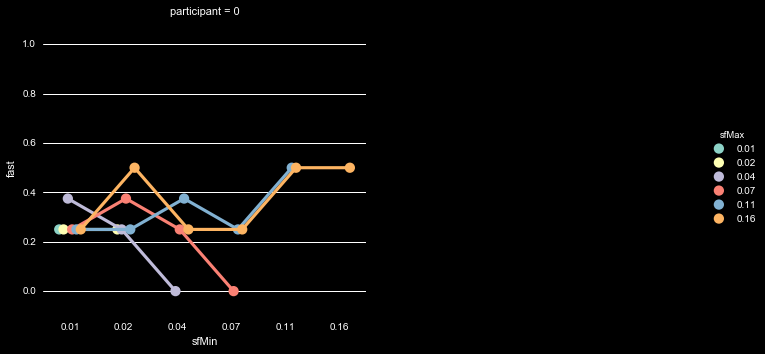

In [53]:
g = sns.factorplot(x='sfMin', y='fast', hue='sfMax', col='participant', col_wrap=2, ci=None,
                   n_boot=200, dodge=.4, data=ds, size=5)
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

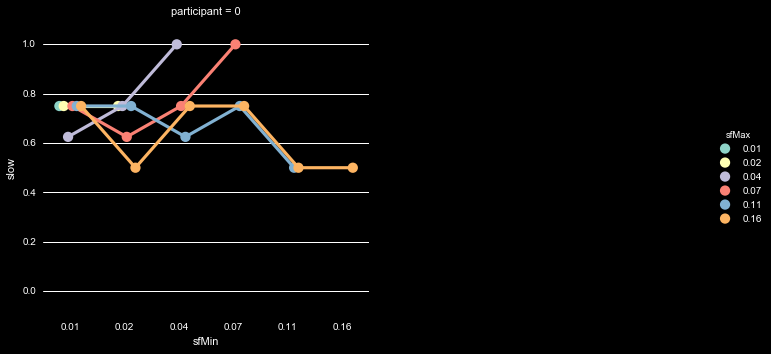

In [52]:
g = sns.factorplot(x='sfMin', y='slow', hue='sfMax', col='participant', col_wrap=2, ci=None,
                   n_boot=200, dodge=.4, data=ds, size=5)
plt.ylim(-0.1,1.1)

### Ring size as a function of spatial frequency

#### Pooled across fast/slow center

(0, 260)

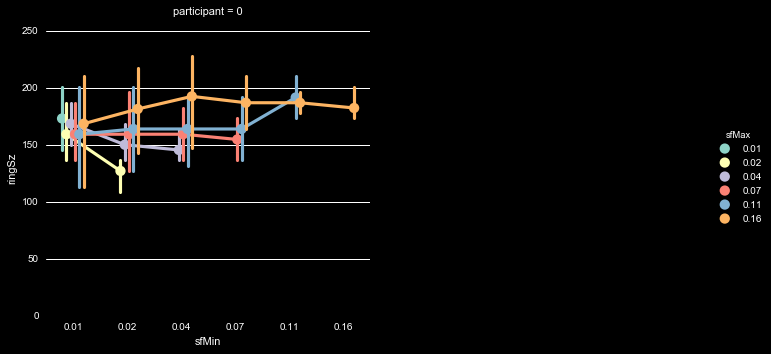

In [54]:
g = sns.factorplot(x='sfMin', y='ringSz', hue='sfMax', col='participant', col_wrap=2, ci=95,
                   n_boot=200, dodge=.4, data=ds, size=5)
plt.ylim(0,260)

#### Ring size for fast center motion

(0, 260)

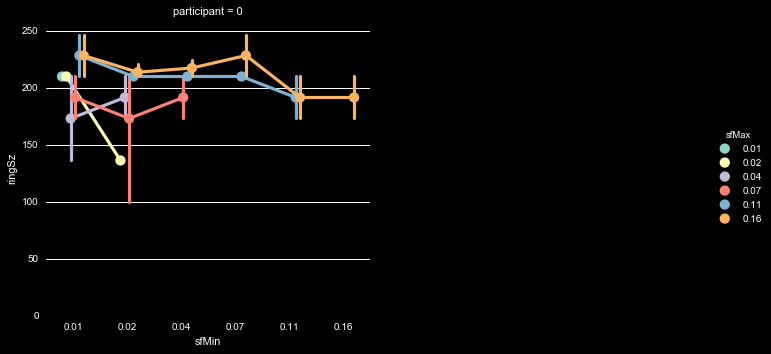

In [49]:
ssFast = ds[ds.fast==1]
g = sns.factorplot(x='sfMin', y='ringSz', hue='sfMax', col='participant', col_wrap=2, ci=95,
                   n_boot=200, dodge=.4, data=ssFast, size=5)
plt.ylim(0,260)

Interpretation here.

#### Ring size for slow center motion

(0, 260)

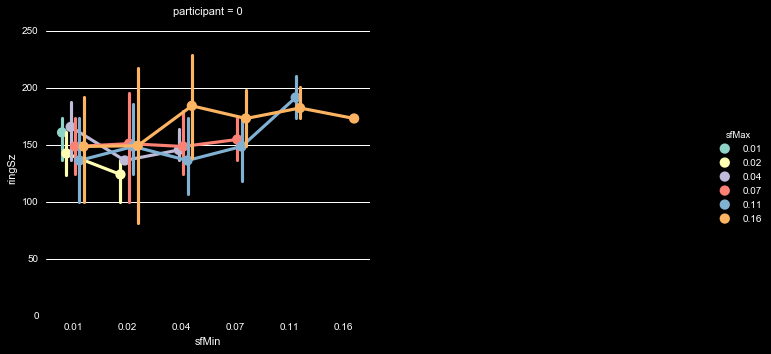

In [50]:
ssSlow = ds[ds.slow==1]
g = sns.factorplot(x='sfMin', y='ringSz', hue='sfMax', col='participant', col_wrap=2, ci=95,
                   n_boot=200, dodge=.4, data=ssSlow, size=5)
plt.ylim(0,260)

Interpretation here.

# Eye-tracking data

## Data import

In [44]:
subjEtPath = glob.glob(allSubjDirs[6] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
from cili.extract import extract_event_ranges
ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr])
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr])
trialStartStr = [s for s in mess if 'START' in s]
trialStart = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialStartStr])
trialEndStr = [s for s in mess if 'END' in s]
trialEnd = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialEndStr])
trials = pd.DataFrame({'trialN':trialN, 'trialTS':trialTS, 'trialStartTS':trialStart,
                      'trialEndTS':trialEnd})
trials['trialLength'] = trials['trialEndTS'] - trials['trialStartTS']
trials = trials[['trialN', 'trialTS', 'trialStartTS', 'trialEndTS', 'trialLength']]
print np.max(trials['trialLength'])
#print trials.head(5)

IndexError: list index out of range

In [ ]:
# Creating my own ranges for each trial, with N number of samples:
#nSamples = 1500
#ranges = np.zeros((len(trialN),nSamples,6)) # 6 is for all six variables (L/R x,y,pup)
#print trialTS[0]
#print samps.ix[samps.ix>trialTS[0],0]
#print samps.index
#print samps.ix[int(trialTS[0]):int(trialTS[0])+600]
#print trialN
#trialStart = trialN # initiating a new variable to collect the 'actual' start
#trialEnd = trialN # the 'actual' end
#print trialN[-1] == 96
#for t in trialN:
    #print t
    # the actual start is the first data point following a trial time stamp:
    #trialStart[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t-1])]
    #trialStart[t-1] = 
    #print t==trialN[-1]
    #if t != 96: # trialN[-1]: #WHY DOESN'T THIS WORK?!
        #print trialTS[t]
        #trialEnd[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t])]
    #else:
        #trialEnd[t-1] = samps.index[-1]
    #end = trialStart[t-1]+nSamples
    #print end
    #ranges[t,:,:] = samps.ix[beg:end]
    #samps.ix[int(trialTS[int(t)-1]):int(trialTS[int(t)-1]+nSamples)]
#print trialStart
#print trialEnd